In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## Function for plotting the time series

In [2]:
def plot_series(time,series,format="-",start=0,end=None,label=None):
    plt.plot(time[start:end],series[start:end],format,label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend()
    plt.grid(True)

## Functions for creating a time series

In [3]:
def trend(time, slope=0):
    return slope*time

def seasonal_pattern(season_time):
    return np.where(season_time < 0.4,
    np.cos(season_time * 2 * np.pi),
    1 / np.exp(3 * season_time))

def seasonality(time,period,amplitude=1,phase=0):
    season_time = ((time + phase)%period) / period
    return amplitude * seasonal_pattern(season_time)

def white_noise(time,noise_level=1,seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

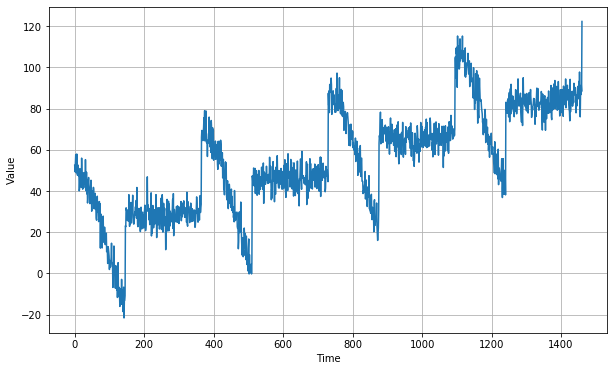

In [4]:
time = np.arange(4 * 365 + 1)

slope = 0.05
baseline = 10
amplitude = 40
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

noise_level = 5
noise = white_noise(time, noise_level, seed=42)

series += noise

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

### So this is the time series

### Now trying the Naive Method of forecasting

In [5]:
split_time = 1000
train_time = time[:split_time]
train_value = series[:split_time]
test_time = time[split_time:]
test_value = series[split_time:]

In [6]:
naive_forecast = series[split_time - 1 : -1]

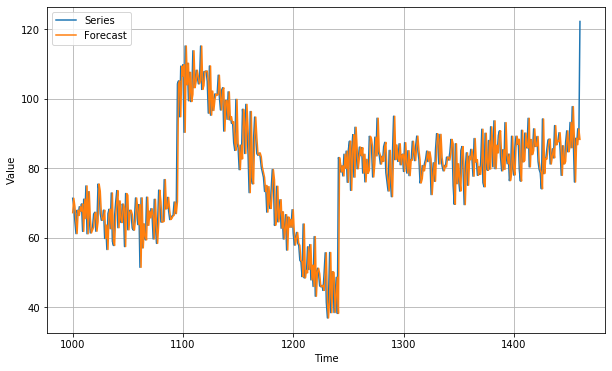

In [12]:
plt.figure(figsize=(10,6))
plot_series(test_time,test_value,label="Series")
plot_series(test_time,naive_forecast,label="Forecast")

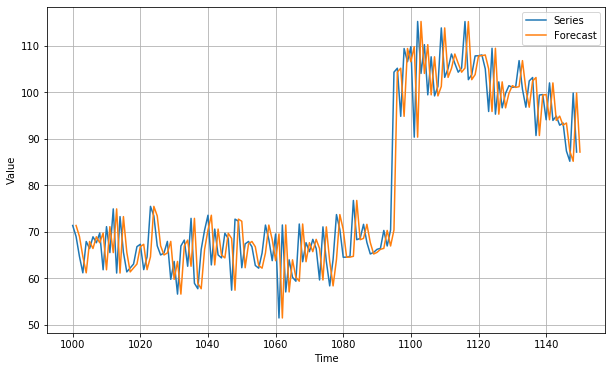

In [13]:
#zooming

plt.figure(figsize=(10,6))
plot_series(test_time,test_value,start=0,end=150,label="Series")
plot_series(test_time,naive_forecast,start=1,end=151,label="Forecast")

In [15]:
#calculating the mean absolute error
errors = naive_forecast - test_value
abs_errors = np.abs(errors)
mae = abs_errors.mean()
mae

5.9379085153216735